# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
from scipy.stats import linregress
import scipy.stats as stats

# Import API key
from Homework6_api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
cities_df=pd.DataFrame(cities)
cities_df.columns=["City"]

# Print the city count to confirm sufficient count
len(cities)

593

In [7]:
cities

['barrow',
 'pitimbu',
 'mar del plata',
 'georgetown',
 'cape town',
 'clarence town',
 'urdzhar',
 'qaanaaq',
 'popova',
 'bedford',
 'albany',
 'ushuaia',
 'tasiilaq',
 'orangeburg',
 'sakakah',
 'atuona',
 'shkotovo-26',
 'new norfolk',
 'thompson',
 'alofi',
 'mataura',
 'kijang',
 'port alfred',
 'saint-philippe',
 'severo-yeniseyskiy',
 'nizhneyansk',
 'bredasdorp',
 'fez',
 'chapais',
 'busselton',
 'dikson',
 'makakilo city',
 'cape girardeau',
 'berlevag',
 'tuktoyaktuk',
 'vaini',
 'hermanus',
 'bengkulu',
 'bluff',
 'aklavik',
 'pangnirtung',
 'sentyabrskiy',
 'arraial do cabo',
 'nikolskoye',
 'trapani',
 'sao joao da barra',
 'jamestown',
 'rikitea',
 'kunming',
 'sisimiut',
 'kholodnyy',
 'dnestrovsc',
 'ilheus',
 'aras',
 'storforshei',
 'jalu',
 'guerrero negro',
 'port elizabeth',
 'attawapiskat',
 'lompoc',
 'erkner',
 'yar-sale',
 'hilo',
 'cody',
 'zhanatas',
 'saint-joseph',
 'vao',
 'tanete',
 'padang',
 'codrington',
 'shakawe',
 'krasnoselkup',
 'piranshahr',
 

In [8]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
response = requests.get(url + "&q=" + city ).json()
response

{'coord': {'lon': 24.93, 'lat': 49.45},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 58.96,
  'feels_like': 58.17,
  'temp_min': 58.96,
  'temp_max': 58.96,
  'pressure': 1007,
  'humidity': 93,
  'sea_level': 1007,
  'grnd_level': 972},
 'wind': {'speed': 5.28, 'deg': 200},
 'rain': {'1h': 0.61},
 'clouds': {'all': 100},
 'dt': 1591417228,
 'sys': {'country': 'UA', 'sunrise': 1591409744, 'sunset': 1591467755},
 'timezone': 10800,
 'id': 712374,
 'name': 'Berezhany',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
i=0
j=0
city2=[]
lat = []
lng = []
Max_temp = []
hum = []
cld= []
wnd_speed =[]
country = []
date = []
print("Beginning Data Retrieval")
print("---------------------------")
for city in cities:
    
    print(f"Processing Record {i} of Set {j} | {city} ")
    try:
        response = requests.get(url + "&q=" + city).json()
        city2.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cld.append(response['clouds']['all'])
        wnd_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        time.sleep(10)
        print("City not found. Skipping...")
        pass
    if i != 50:
        i=i+1
    elif i ==50:
        i=0
        j=j+1
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")
        

Beginning Data Retrieval
---------------------------
Processing Record 0 of Set 0 | barrow 
Processing Record 1 of Set 0 | pitimbu 
Processing Record 2 of Set 0 | mar del plata 
Processing Record 3 of Set 0 | georgetown 
Processing Record 4 of Set 0 | cape town 
Processing Record 5 of Set 0 | clarence town 
Processing Record 6 of Set 0 | urdzhar 
City not found. Skipping...
Processing Record 7 of Set 0 | qaanaaq 
Processing Record 8 of Set 0 | popova 
Processing Record 9 of Set 0 | bedford 
Processing Record 10 of Set 0 | albany 
Processing Record 11 of Set 0 | ushuaia 
Processing Record 12 of Set 0 | tasiilaq 
Processing Record 13 of Set 0 | orangeburg 
Processing Record 14 of Set 0 | sakakah 
Processing Record 15 of Set 0 | atuona 
Processing Record 16 of Set 0 | shkotovo-26 
City not found. Skipping...
Processing Record 17 of Set 0 | new norfolk 
Processing Record 18 of Set 0 | thompson 
Processing Record 19 of Set 0 | alofi 
Processing Record 20 of Set 0 | mataura 
Processing Recor

City not found. Skipping...
Processing Record 28 of Set 3 | klaksvik 
Processing Record 29 of Set 3 | hamilton 
Processing Record 30 of Set 3 | makat 
Processing Record 31 of Set 3 | illoqqortoormiut 
City not found. Skipping...
Processing Record 32 of Set 3 | methoni 
Processing Record 33 of Set 3 | sabaudia 
Processing Record 34 of Set 3 | abu zabad 
Processing Record 35 of Set 3 | fortuna 
Processing Record 36 of Set 3 | cabo san lucas 
Processing Record 37 of Set 3 | kayerkan 
Processing Record 38 of Set 3 | winona 
Processing Record 39 of Set 3 | sinnar 
Processing Record 40 of Set 3 | mayumba 
Processing Record 41 of Set 3 | coihaique 
Processing Record 42 of Set 3 | coruripe 
Processing Record 43 of Set 3 | caravelas 
Processing Record 44 of Set 3 | skagastrond 
City not found. Skipping...
Processing Record 45 of Set 3 | chokurdakh 
Processing Record 46 of Set 3 | faanui 
Processing Record 47 of Set 3 | xinqing 
Processing Record 48 of Set 3 | peterhead 
Processing Record 49 of 

Processing Record 12 of Set 7 | san ramon 
Processing Record 13 of Set 7 | pinehurst 
Processing Record 14 of Set 7 | paralimni 
Processing Record 15 of Set 7 | rio rancho 
Processing Record 16 of Set 7 | saint-augustin 
Processing Record 17 of Set 7 | inhambane 
Processing Record 18 of Set 7 | boralday 
Processing Record 19 of Set 7 | takoradi 
Processing Record 20 of Set 7 | araouane 
Processing Record 21 of Set 7 | sergiyevsk 
Processing Record 22 of Set 7 | roncesvalles 
Processing Record 23 of Set 7 | grand gaube 
Processing Record 24 of Set 7 | sola 
Processing Record 25 of Set 7 | teya 
Processing Record 26 of Set 7 | sungaipenuh 
Processing Record 27 of Set 7 | ullapool 
Processing Record 28 of Set 7 | waw 
Processing Record 29 of Set 7 | praia da vitoria 
Processing Record 30 of Set 7 | goma 
Processing Record 31 of Set 7 | talaya 
Processing Record 32 of Set 7 | huilong 
Processing Record 33 of Set 7 | ponta delgada 
Processing Record 34 of Set 7 | chake chake 
Processing Rec

Processing Record 48 of Set 10 | shchelyayur 
City not found. Skipping...
Processing Record 49 of Set 10 | prescot 
Processing Record 50 of Set 10 | evanston 
Processing Record 0 of Set 11 | valdivia 
Processing Record 1 of Set 11 | kutum 
Processing Record 2 of Set 11 | coffs harbour 
Processing Record 3 of Set 11 | manturovo 
Processing Record 4 of Set 11 | verkhoyansk 
Processing Record 5 of Set 11 | oyama 
Processing Record 6 of Set 11 | da nang 
Processing Record 7 of Set 11 | teeli 
Processing Record 8 of Set 11 | taoudenni 
Processing Record 9 of Set 11 | santa rita 
Processing Record 10 of Set 11 | buta 
Processing Record 11 of Set 11 | klyuchi 
Processing Record 12 of Set 11 | bur gabo 
City not found. Skipping...
Processing Record 13 of Set 11 | nanuque 
Processing Record 14 of Set 11 | saint-pierre 
Processing Record 15 of Set 11 | new port richey 
Processing Record 16 of Set 11 | sena madureira 
Processing Record 17 of Set 11 | mao 
Processing Record 18 of Set 11 | cayenne 

In [ ]:
### Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame

In [15]:
weather_dict = {"City": city2,"Lat": lat,"Lng": lng,"Max_temp": Max_temp,"Humidity": hum,"Cloudiness": cld,"Wind_speed": wnd_speed,"Country": country,"Date": date}
weather_data = pd.DataFrame(weather_dict)
weather_data


,City,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind_speed,Country,Date
0,Barrow,71.29,-156.79,32.00,88,90,18.34,US,1591417254
1,Pitimbu,-7.47,-34.81,77.31,86,17,14.07,BR,1591417238
2,Mar del Plata,-38.00,-57.56,55.00,100,8,4.70,AR,1591417151
3,George Town,5.41,100.34,84.20,79,20,6.93,MY,1591417238
4,Cape Town,-33.93,18.42,53.60,100,20,1.12,ZA,1591416970
...,...,...,...,...,...,...,...,...,...
547,Karwar,14.80,74.13,82.92,77,27,6.46,IN,1591417398
548,Mandan,46.83,-100.89,64.99,59,1,9.17,US,1591417380
549,Kifrī,34.70,44.97,89.29,12,0,10.54,IQ,1591417398
550,Owase,34.07,136.20,78.62,60,100,4.25,JP,1591417398


In [49]:
weather_data.to_csv("Weather_cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
hum

[88,
 86,
 100,
 79,
 100,
 55,
 87,
 46,
 79,
 78,
 93,
 94,
 88,
 16,
 76,
 71,
 43,
 74,
 80,
 50,
 84,
 64,
 38,
 93,
 52,
 66,
 41,
 98,
 51,
 94,
 87,
 70,
 83,
 88,
 58,
 60,
 28,
 90,
 81,
 82,
 82,
 82,
 83,
 81,
 60,
 80,
 30,
 88,
 90,
 93,
 78,
 64,
 79,
 87,
 82,
 81,
 47,
 65,
 49,
 64,
 65,
 72,
 54,
 75,
 58,
 51,
 27,
 77,
 100,
 60,
 84,
 86,
 26,
 45,
 73,
 89,
 83,
 86,
 87,
 64,
 55,
 54,
 74,
 83,
 45,
 93,
 80,
 73,
 96,
 64,
 17,
 69,
 69,
 93,
 71,
 81,
 64,
 30,
 92,
 77,
 93,
 88,
 49,
 94,
 80,
 66,
 77,
 91,
 77,
 26,
 91,
 80,
 66,
 87,
 45,
 51,
 94,
 72,
 1,
 76,
 53,
 73,
 87,
 53,
 82,
 53,
 17,
 50,
 73,
 57,
 69,
 64,
 83,
 79,
 62,
 37,
 82,
 89,
 61,
 48,
 70,
 57,
 92,
 88,
 64,
 78,
 96,
 69,
 72,
 29,
 28,
 82,
 88,
 70,
 57,
 75,
 88,
 96,
 69,
 61,
 47,
 45,
 65,
 93,
 83,
 48,
 68,
 86,
 46,
 81,
 60,
 70,
 77,
 40,
 91,
 93,
 83,
 84,
 40,
 58,
 34,
 87,
 46,
 94,
 67,
 81,
 48,
 79,
 35,
 84,
 100,
 88,
 74,
 100,
 69,
 52,
 70,
 96,
 75,
 

In [ ]:
#NEW=weather_data.set_index('Humidity')
#NEW1=NEW.drop(index<100)
#W_D = NEW1.reset_index()
#w_D

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

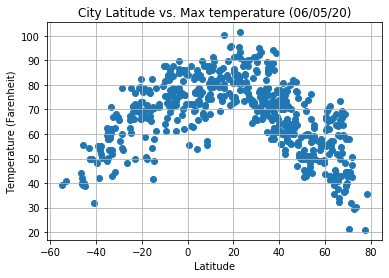

In [17]:
# Create a Scatter Plot for Max temperature vs. latitude
plt.scatter(weather_data["Lat"], weather_data["Max_temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max temperature (06/05/20)")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
# Show plot
plt.show()




## Latitude vs. Humidity Plot

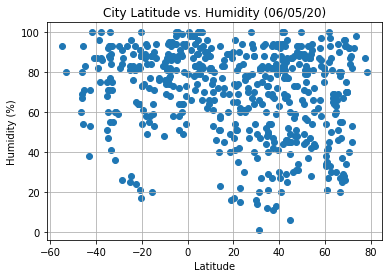

In [18]:
# Create a Scatter Plot for Humidity Plot vs. latitude
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (06/05/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

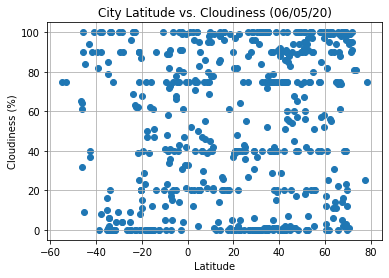

In [19]:
# Create a Scatter Plot for Cloudiness Plot vs. latitude
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (06/05/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

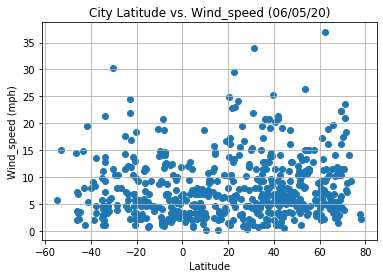

In [20]:
# Create a Scatter Plot for Wind_speed Plot vs. latitude
plt.scatter(weather_data["Lat"], weather_data["Wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind_speed (06/05/20)")
plt.ylabel("Wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [27]:
# Create Northern and Southern Hemisphere DataFrames
Northern_cities=weather_data.loc[weather_data["Lat"]>0]
Northern_cities

,City,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind_speed,Country,Date
0,Barrow,71.29,-156.79,32.00,88,90,18.34,US,1591417254
3,George Town,5.41,100.34,84.20,79,20,6.93,MY,1591417238
6,Qaanaaq,77.48,-69.36,20.93,87,25,3.15,GL,1591417239
7,Popova,42.96,131.72,73.40,46,0,6.71,RU,1591417239
8,Bedford,52.13,-0.47,44.01,79,0,5.01,GB,1591417098
...,...,...,...,...,...,...,...,...,...
547,Karwar,14.80,74.13,82.92,77,27,6.46,IN,1591417398
548,Mandan,46.83,-100.89,64.99,59,1,9.17,US,1591417380
549,Kifrī,34.70,44.97,89.29,12,0,10.54,IQ,1591417398
550,Owase,34.07,136.20,78.62,60,100,4.25,JP,1591417398


In [26]:
# Create Northern and Southern Hemisphere DataFrames
Southern_cities=weather_data.loc[weather_data["Lat"]<0]
Southern_cities

,City,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind_speed,Country,Date
1,Pitimbu,-7.47,-34.81,77.31,86,17,14.07,BR,1591417238
2,Mar del Plata,-38.00,-57.56,55.00,100,8,4.70,AR,1591417151
4,Cape Town,-33.93,18.42,53.60,100,20,1.12,ZA,1591416970
5,Clarence Town,-32.58,151.78,66.99,55,75,4.70,AU,1591417239
10,Ushuaia,-54.80,-68.30,39.20,93,75,5.82,AR,1591417242
14,Atuona,-9.80,-139.03,81.48,76,5,14.76,PF,1591417257
15,New Norfolk,-42.78,147.06,50.00,71,37,1.01,AU,1591417258
17,Alofi,-19.06,-169.92,78.80,74,29,5.82,NU,1591417258
18,Mataura,-46.19,168.86,39.58,80,32,3.71,NZ,1591417258
20,Port Alfred,-33.59,26.89,62.01,84,0,4.00,ZA,1591417259


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5035709586017144


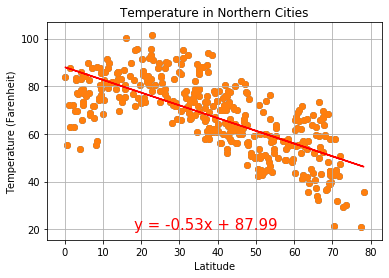

y = -0.53x + 87.99


In [38]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(Northern_cities["Lat"], Northern_cities["Max_temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in Northern Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
x_values= Northern_cities["Lat"]
y_values= Northern_cities["Max_temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6183633456125914


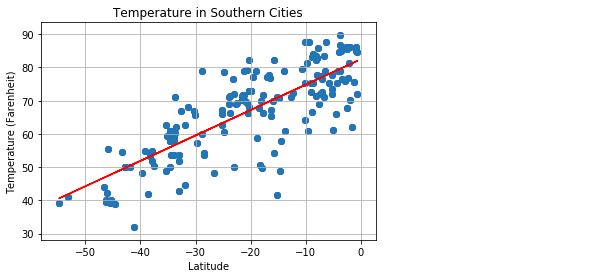

y = 0.76x + 82.46


In [43]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(Southern_cities["Lat"], Southern_cities["Max_temp"], marker="o",color='blue')

# Incorporate the other graph properties
plt.title("Temperature in Southern Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
x_values= Southern_cities["Lat"]
y_values=Southern_cities["Max_temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.022612224760661954


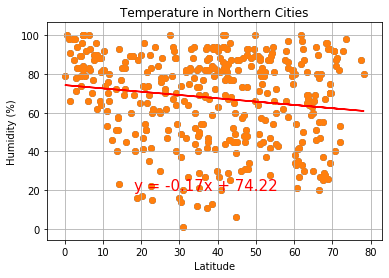

y = -0.17x + 74.22


In [39]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(Northern_cities["Lat"], Northern_cities["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in Northern Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
x_values= Northern_cities["Lat"]
y_values= Northern_cities["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009316194835036243


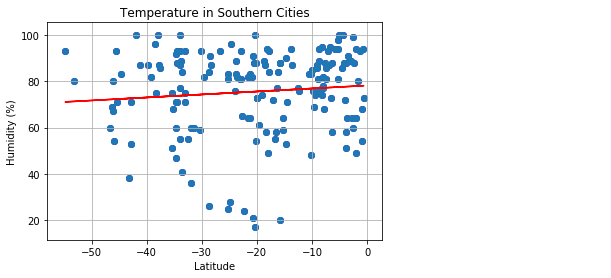

y = 0.13x + 78.22


In [44]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(Southern_cities["Lat"], Southern_cities["Humidity"], marker="o",color='blue')

# Incorporate the other graph properties
plt.title("Temperature in Southern Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
x_values= Southern_cities["Lat"]
y_values=Southern_cities ["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013217661982602583


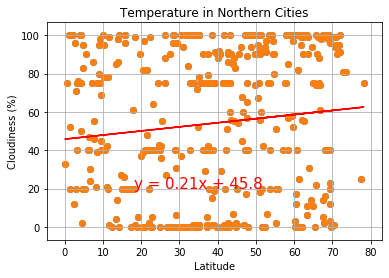

y = 0.21x + 45.8


In [45]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(Northern_cities["Lat"], Northern_cities["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in Northern Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
x_values= Northern_cities["Lat"]
y_values= Northern_cities["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.17004510657099e-05


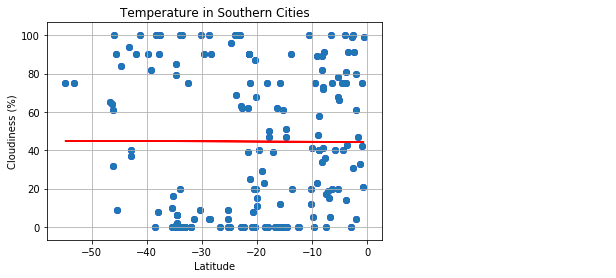

y = -0.01x + 44.37


In [46]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(Southern_cities["Lat"], Southern_cities["Cloudiness"], marker="o",color='blue')

# Incorporate the other graph properties
plt.title("Temperature in Southern Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
x_values= Southern_cities["Lat"]
y_values=Southern_cities["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.019735828377953596


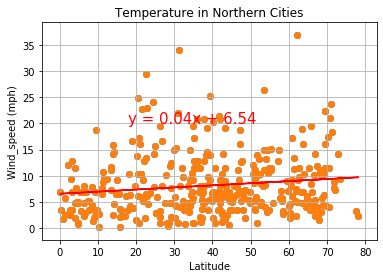

y = 0.04x + 6.54


In [40]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(Northern_cities["Lat"], Northern_cities["Wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in Northern Cities")
plt.ylabel("Wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
x_values= Northern_cities["Lat"]
y_values= Northern_cities["Wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0019514508900025677


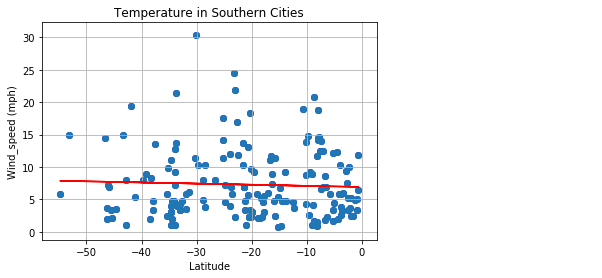

y = -0.02x + 6.93


In [47]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(Southern_cities["Lat"], Southern_cities["Wind_speed"], marker="o",color='blue')

# Incorporate the other graph properties
plt.title("Temperature in Southern Cities")
plt.ylabel("Wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
x_values= Southern_cities["Lat"]
y_values=Southern_cities ["Wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)

In [52]:
## Obserbations 
#the patterns tned to be similar dispidte the time as I have seen wiht the home work display 
#the temperature and the latitude are the most correalted factors given a r value more than 0.5
#the wind speed seems to be the leaste afected by the latitude with an r value below 0.02